<h1> Get Data from Mongo </h1>

In [1]:
import datetime
from pymongo import MongoClient
import pandas as pd
import numpy
import scipy
import matplotlib as mpl
import collections
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
client = MongoClient()
db = client.emoji_db
tweets = db.emoji_tweets

In [2]:
#connect to AWS
client = MongoClient('52.38.112.55',27017) # now 52.40.90.162
db = client.emoji_db
tweets = db.emoji_tweets

In [3]:
tweets.find_one().keys()

[u'lang',
 u'emjCount',
 u'mostFreqEmojiCount',
 u'retweet_count',
 u'emjText',
 u'mostFreqWord',
 u'goe',
 u'mostFreqWordCount',
 u'created_at',
 u'coordinates',
 u'text',
 u'favorite_count',
 u'emjTypes',
 u'date',
 u'_id',
 u'mostFreqEmoji']

<h1> Get total count </h1>

In [21]:
2232%3

0

In [15]:
for ii,tweet in enumerate(tweets.find(no_cursor_timeout=True).limit(10)): #prevent 10 min cursor timeout
    if ii%3==0:
        print(tweet['text'])

طه منو يتكلم زبالة الشارع صميها انا اقول🖕🏿
RT @opalescenttree: @arayahenryy she's gonna kill you 😂😂
Alycia demora 2 semana pra aparecer no tt e quando volta posta so uma coisinha atoa e agora deve sumir de novo... 💔😭💔😭💔😭
RT @WorldStarDaiIy: Mexican president tells a Fox anchor that  Mexico is not paying for that "fucking wall" on live tv 💀🔥 https://t.co/1AwU…


In [22]:
tweet

u'lang'

In [4]:
#read emoji codes:
import os
base_dir=os.path.expanduser('~')
emoji_key = pd.read_excel(base_dir+'/emojify/data/emoji_list.xlsx', encoding='utf-8', index_col=0, skiprows=1)
emj_codes_skin=[code for code,name in zip(emoji_key['Unicode'],emoji_key['Name']) if ('FITZPATRICK' in name)]
emj_codes=[code for code in emoji_key['Unicode'] if code!="Browser" \
           if (code not in emj_codes_skin) if sum([c=="*" for c in code])==0]
#remove common face emojis
noise_index=range(69)
emj_codes_noise=[code for index,code in zip(emoji_key.index,emoji_key['Unicode']) if index in noise_index]

In [7]:
emj_codes_noise

[u'\U0001f600',
 u'\U0001f601',
 u'\U0001f602',
 u'\U0001f603',
 u'\U0001f604',
 u'\U0001f605',
 u'\U0001f606',
 u'\U0001f609',
 u'\U0001f60a',
 u'\U0001f60b',
 u'\U0001f60e',
 u'\U0001f60d',
 u'\U0001f618',
 u'\U0001f617',
 u'\U0001f619',
 u'\U0001f61a',
 u'\u263a\ufe0f',
 u'\U0001f642',
 u'\U0001f917',
 u'\U0001f607',
 u'\U0001f914',
 u'\U0001f610',
 u'\U0001f611',
 u'\U0001f636',
 u'\U0001f644',
 u'\U0001f60f',
 u'\U0001f623',
 u'\U0001f625',
 u'\U0001f62e',
 u'\U0001f910',
 u'\U0001f62f',
 u'\U0001f62a',
 u'\U0001f62b',
 u'\U0001f634',
 u'\U0001f60c',
 u'\U0001f913',
 u'\U0001f61b',
 u'\U0001f61c',
 u'\U0001f61d',
 u'\u2639',
 u'\U0001f641',
 u'\U0001f612',
 u'\U0001f613',
 u'\U0001f614',
 u'\U0001f615',
 u'\U0001f616',
 u'\U0001f643',
 u'\U0001f637',
 u'\U0001f912',
 u'\U0001f915',
 u'\U0001f911',
 u'\U0001f632',
 u'\U0001f61e',
 u'\U0001f61f',
 u'\U0001f624',
 u'\U0001f622',
 u'\U0001f62d',
 u'\U0001f626',
 u'\U0001f627',
 u'\U0001f628',
 u'\U0001f629',
 u'\U0001f62c',
 u'\U0001f

<h1> Select on most Frequent Emoji </h1>

In [5]:
for tweet in tweets.find({'mostFreqEmoji': u'🍆'}): #🍆
    print(tweet['text']) #print the text
    #print(tweet['mostFreqWord']) #print most frequent word

@akarreno ¿🍆?
RT @PornHubVid: Take care of each other 😍🍆🐱 https://t.co/qFL56Vn3iT
RT @okaaykaay__: any nigga that dont eat their girl 😽 is lame, any girl that dont suck they nigga 🍆 lame. lmao idgaf 😂
RT @satxllitelrh: Hey I draw @Michael5SOS and it didn't suck!!😝🍆💕 #5sosfanart #5sosart #5sos @5SOS http://t.co/6sxOSQREAW
When the dick so good she forgot what she was talking about 👌💁😆😁🍆💦
I don't think I can last another day in Cali, yet along this celibacy shit. I want daddy 🍆
@pajaruu13_moe 
おやすみやさい🍆
Its 10K For My 🍆Dick Broke Bitches Make Me Sicc 😏
もたなす可愛い😍🍆🍆🍆
RT @okami0525: ねーさん。ぽっぽ。ありがとう🐤💕
久しぶりの元剣道部と剣道部たち😊 
羽咋中女子剣道部は、ほんと仲いいしダラやわ笑
重要な🍆おらんくて寂しかった。4人で羽女剣やもん〜〜
こんどは4人で❣️ https://t.co/DYfYZvpQwS
RT @VanessaMorgan: That awkward moment when you tell your gfs you got knocked up by your side piece🍆 😂 #mtv #findingcarter https://t.co/sIr…
RT @AmielGimenez: 🍆 Nuevo Video
🍆"Chubby Bunny Extremo" con @AugusGimenez 
🍆 https://t.co/JRrsOxHfVg
🍆 Rts y Favs 
🍆 Compartan 
🍆 Comenten
RT @fckmeboy: foll

In [7]:
tweet['emjText']

[[u'\U0001f346', 1]]

<h1> Select on the most frequent word </h1>

In [143]:
S= collections.defaultdict(lambda:0)

for tweet in tweets.find({'mostFreqWord': 'soup'.lower()}):
    print(tweet['text'])
    #print(tweet['emjText'])
    for val in tweet['emjText']:
        S[val[0]]+=val[1]
df_Frq=pd.DataFrame([(key,S[key]) for key in S],columns=('emoji','freq'))

Eating soup 😴


In [144]:
df_Frq.sort('freq',ascending=0)

/Users/attiladobi/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,emoji,freq
0,😴,1


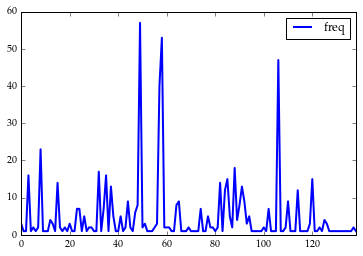

In [88]:
df_Frq.plot()

<h1> Filter on emojiText </h1>

In [315]:
for tweet in tweets.find({'emjText'[1]:{"$gt": 2}}):
    print(tweet['text'])

<h1> Filter on number of emoji </h1>

In [334]:
for tweet in tweets.find({'emjCount': {"$gt": 30} ,'emjTypes': {"$gt": 0} } ): #🍆 #greaterthan: {"$gt": 3}
    print(tweet['text']) #print the text
    #print(tweet['emjText'])
    #print(tweet['mostFreqWord']) #print most frequent word

@queen8657 
ههههههههههههههههههههههههههههه توي اقوله فالقروب اقول ماعاد عرفتنا تلخبطنا 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂
RT @suga_wife13: #arabarmyslovebts @bts_twt

🍸💗💗🍸💗💗🍸
💗💗💗💗😍😍😍
💗💗💗💗😍💗😍
🍸💗💗💗😍💗😍
🍸🍸💗💗😍😍😍
🍸🍸🍸💗🍸🍸🍸
🍸💜💜🍸💜💜🍸
💜💜💜💜💜💜💜
💜🌹💜🌹💜💜💜
🍸🌹💜🌹💜💜🍸
🍸🌹💜🌹💜🍸🍸
🍸🍸🌹💜🍸🍸🍸
RT @LegaNordVeneta: 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂
https://t.co/YGVZyY3tli https://t.co/palP6cFAN5
😱😱😱😱😱😱😱😱😱😱😱😱"@yemelin: 😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭
🍗🍗🍗🍗🍗🍗🍗🍗🍗🍗🐣🐥🐥🐥🐔🐔🐔🍗🍗🍗🐔🍗🍗🐔🍗🐔🍗🐔🍗🐔🍗🐔🍗🐥🐣🍗🍗🍗🍗🍗🍗🍗🐔🐥🐣🐥🐣🍗🐣🍗🐣🍗🐥🐔🐣🐣🍗🐥🍗🐥🐥🐥🐥🍗🍗🍗🍗🍗🐣🍗
RT @IndianaMBB: 1️⃣ hour...

#BeatKentucky 🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️🔴⚪️ https://…
@KathleenLights1 felicidades por los 2 millones !!! Te amo !!  👏🏼👏🏾🎉👏🏻👏🏻🙌🏾🙌🏾🙌🏼🙌😍😍🎉🎉👍🏽👍🏼👍🏿👍💪🏻💃🏻💃🏻💃🏻🏅🏅🏆🏆🏆🎗🎗
@leahmariepipes 
☁☁☁☁☁☁☁
☁🎀🎀☁🎀🎀☁
🎀🎀🎀🎀🎀🎀🎀
🎀🎀🎀🎀🎀🎀🎀
🎀🎀🎀🎀🎀🎀🎀
☁🎀🎀🎀🎀🎀☁
☁☁🎀🎀🎀☁☁
☁☁☁🎀☁☁☁
☁☁☁☁☁☁☁
You are special to me 💙
Happy birthday Colleen!! 🚔🚙🏅👾😟🚑🚌👀😡👽😈👿😹😾👺👺👳🏿👵🏿👮🏾👴🏿👶🏼👀 @cmeid_
RT @itvtakeaway: _________________
          👇
👨‍👩‍

<h1> Filter on a word in the tweet </h1>

In [16]:
S= collections.defaultdict(lambda:0)
for tweet in tweets.find({'text':{"$regex": "wedding"} } ): #🍆 #greaterthan: {"$gt": 3}
    #print(tweet['text']) #print the text
    for val in tweet['emjText']:
        S[val[0]]+=val[1]
df=pd.DataFrame([ (key,value) for key,value in S.items()], columns=('emoji','freq'))
df.sort('freq',ascending=0)

/Users/attiladobi/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,emoji,freq
34,😂,10
9,❤️,8
3,👰,7
39,😇,6
26,💍,6
21,🏼,6
44,😍,6
28,😭,4
31,💕,4
1,👰🏼,4


<h1> Filter on a word in the tweet and number of unique emojis </h1>

In [16]:
word = 'flowers'
emoji_filter=False
S= collections.defaultdict(lambda:0)
for tweet in tweets.find({'text':{"$regex": word}, 'emjTypes':{'$gt':0}, 'emjCount':{'$gt':0} } ): #🍆 #greaterthan: {"$gt": 3}
    #print(tweet['text']) #print the text
    if emoji_filter:
        for val in tweet['emjText']:
            if val[0] not in emj_codes_noise:
                S[val[0]]+=val[1]
    else:
        for val in tweet['emjText']:
            S[val[0]]+=val[1]
df=pd.DataFrame([ (key,value) for key,value in S.items()], columns=('emoji','freq'))
df.sort_values('freq',ascending=0)

#make_pie(word,df)

,emoji,freq
35,😍,15
25,💐,8
1,🌷,8
34,😂,7
8,🌸,5
12,🌞,4
4,🌼,4
6,🌺,4
30,💛,4
23,💗,3


<h1> return most frequent emoji in each tweet </h1>

In [13]:
word='flowers'
emoji_filter=True
Sf=collections.defaultdict(lambda:0)
for tweet in tweets.find({'text':{"$regex": word}, 'emjTypes':{'$gt':0}, 'emjCount':{'$gt':0} } ): #🍆 #greaterthan: {"$gt": 3}
    #print(tweet['mostFreqEmoji']) #print the text
    if emoji_filter:
        if tweet['mostFreqEmoji'] not in emj_codes_noise:
            Sf[tweet['mostFreqEmoji']]+=tweet['mostFreqEmojiCount']
    else:
        if tweet['mostFreqEmoji']:
            Sf[tweet['mostFreqEmoji']]+=tweet['mostFreqEmojiCount']
dSf=pd.DataFrame([ (key,value) for key,value in Sf.items()], columns=('emoji','freq'))
dSf.sort_values('freq',ascending=0)

#make_pie(word,df)

,emoji,freq
1,🌷,8
2,💐,8
4,🌞,4
5,💜,2
6,🌼,2
8,🌺,2
9,🌻,2
10,🌸,2
0,🎶,1
3,🌱,1


In [236]:
u'🍆'

u'\U0001f346'

<h1> plot as d3 bar chart </h1>

In [266]:
from nvd3 import multiBarChart, pieChart

# Open File to write the D3 Graph
output_file = open('/Users/attiladobi/PyNotebooks/html/bar-emoji-nvd3.html', 'w')

kwargs1 = {"fontSize": '100'}

chart = multiBarChart(width=1500, height=400, x_axis_format=None, **kwargs1)
xdata = dSf.sort_values('freq',ascending=0)['emoji'].values[:15] #top 20 frequency
#xdata = ['one' , 'two', 'three', 'four']
ydata1 = dSf.sort_values('freq',ascending=0)['freq'].values[:15] #top 20 frequency
#ydata2 = [8, 14, 7, 11]

chart.add_serie(name="Freqency", y=ydata1, x=xdata, **kwargs1)
#chart.add_serie(name="Serie 2", y=ydata2, x=xdata, **kwargs1)
chart.buildhtml()

output_file.write(chart.htmlcontent)

# close Html file
output_file.close()

<h1> Pie chart </h1>

In [19]:
def make_pie(title,df):
    output_file = open('/Users/attiladobi/PyNotebooks/html/{:s}-nvd3.html'.format(title), 'w')


    type = "pieChart"
    chart = pieChart(name=title+' tweets', color_category='category20c', height=800, width=800)
    chart.set_containerheader("\n\n<h1>" + type + "</h1>\n\n")
    chart.style.format({"font-size","100px"})
    chart.callback = '''
                        function(){
                        d3.selectAll(".nv-pie .nv-pie .nv-slice").on('click',
                            function(d){
                            console.log("piechart_callback_test: clicked on slice " + JSON.stringify(d['data']));
                            console.log('/app/fruit?type='.concat(d['data']['label']));
                        }
                    '''

    extra_serie = {"tooltip": {"y_start": "", "y_end": " cal"}}
    xdata = df.sort_values('freq',ascending=0)['emoji'].values[:15] #top 15 frequency
    ydata = df.sort_values('freq',ascending=0)['freq'].values[:15] #top 15 frequency

    chart.add_serie(y=ydata, x=xdata, extra=extra_serie)
    chart.buildhtml()

    output_file.write(chart.htmlcontent)

    # close Html file
    output_file.close()

In [37]:
print('hello,there\n' + '\n'.join([x+','+str(y) for x,y in zip(xdata, ydata )]))

hello,there
😍,15
💐,8
🌷,8
😂,7
🌸,5
🌼,4
🌺,4
🌞,4
💛,4
💗,3
🌻,3
💮,3
😊,2
💚,2
💙,2


In [24]:
xdata = df.sort_values('freq',ascending=0)['emoji'].values[:15] #top 15 frequency
ydata = df.sort_values('freq',ascending=0)['freq'].values[:15] #top 15 frequency

In [ ]:
emoji_usage.find({"has_emoji":True}).count() / emoji_usage.find({"has_emoji":False}).count()